### Importing necessary Libraries. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Loading the datasets.

In [4]:
df = pd.read_csv('train.csv')
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
pd.set_option('display.max_columns', 100)
df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


### Understanding the data. 

In [7]:
print(f"No.of rows : {df.shape[0]}, No.of columns : {df.shape[1]}")
# Even id is not much relevant to our prediction. 
df.drop('id', axis=1, inplace=True)
print(f"No.of rows : {df.shape[0]}, No.of columns : {df.shape[1]}")

No.of rows : 103904, No.of columns : 24
No.of rows : 103904, No.of columns : 23


In [8]:
# Checking NUll values. 
print(f"No.of Null rows : {df.isnull().sum()}")

No.of Null rows : Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


### Handling Null values : 

In [10]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
print(f"No.of Duplicated rows : {df.duplicated().sum()}")

No.of Duplicated rows : 0


### Descriptive statistics of dataset. 

In [13]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Insight : 
1. Most of the columns are on the side of categorical columns. 

### EDA 

### Checking Outliers :

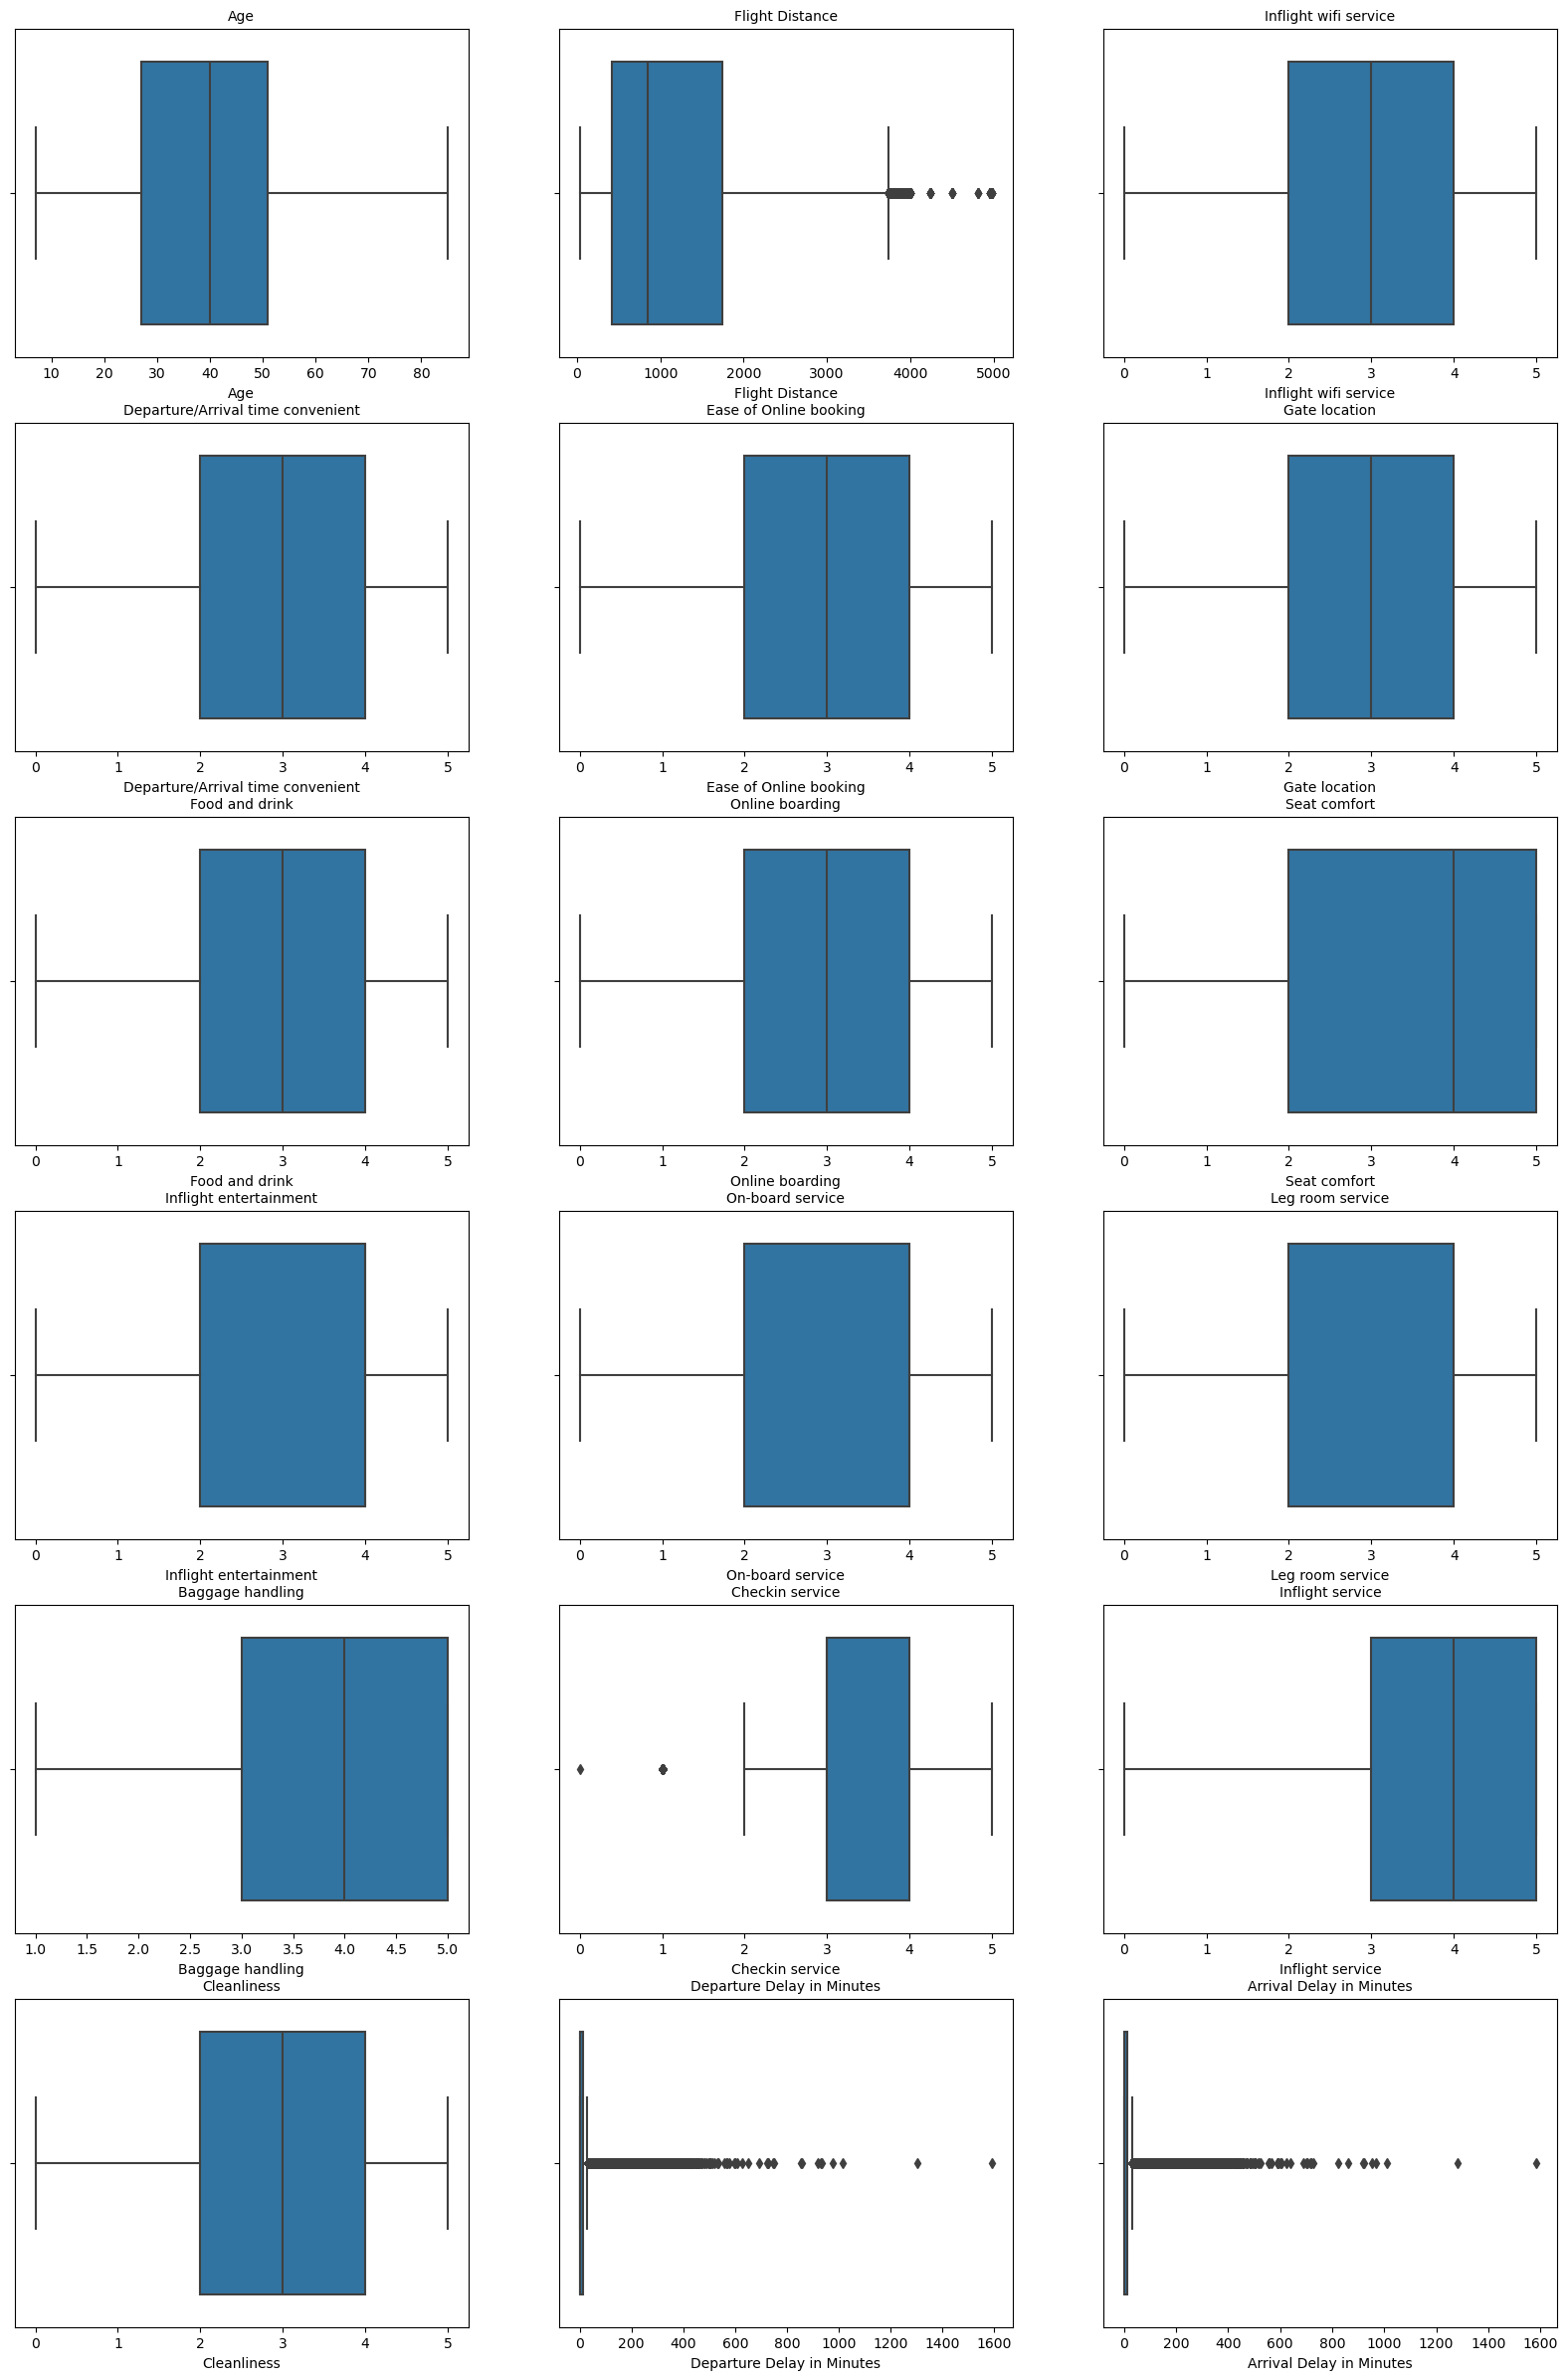

In [17]:
numerical_columns = df.select_dtypes(include=['int','float'])
fig, axes = plt.subplots(6,3, figsize=(20,30))
axes = axes.flatten() 

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
plt.show()

### Insights : 
1. Flight distance outliers are not much. 
2. check-in service outliers are only 2. 
3. Departure delay and arriva delay are quite a lot.

### Handling these outliers 

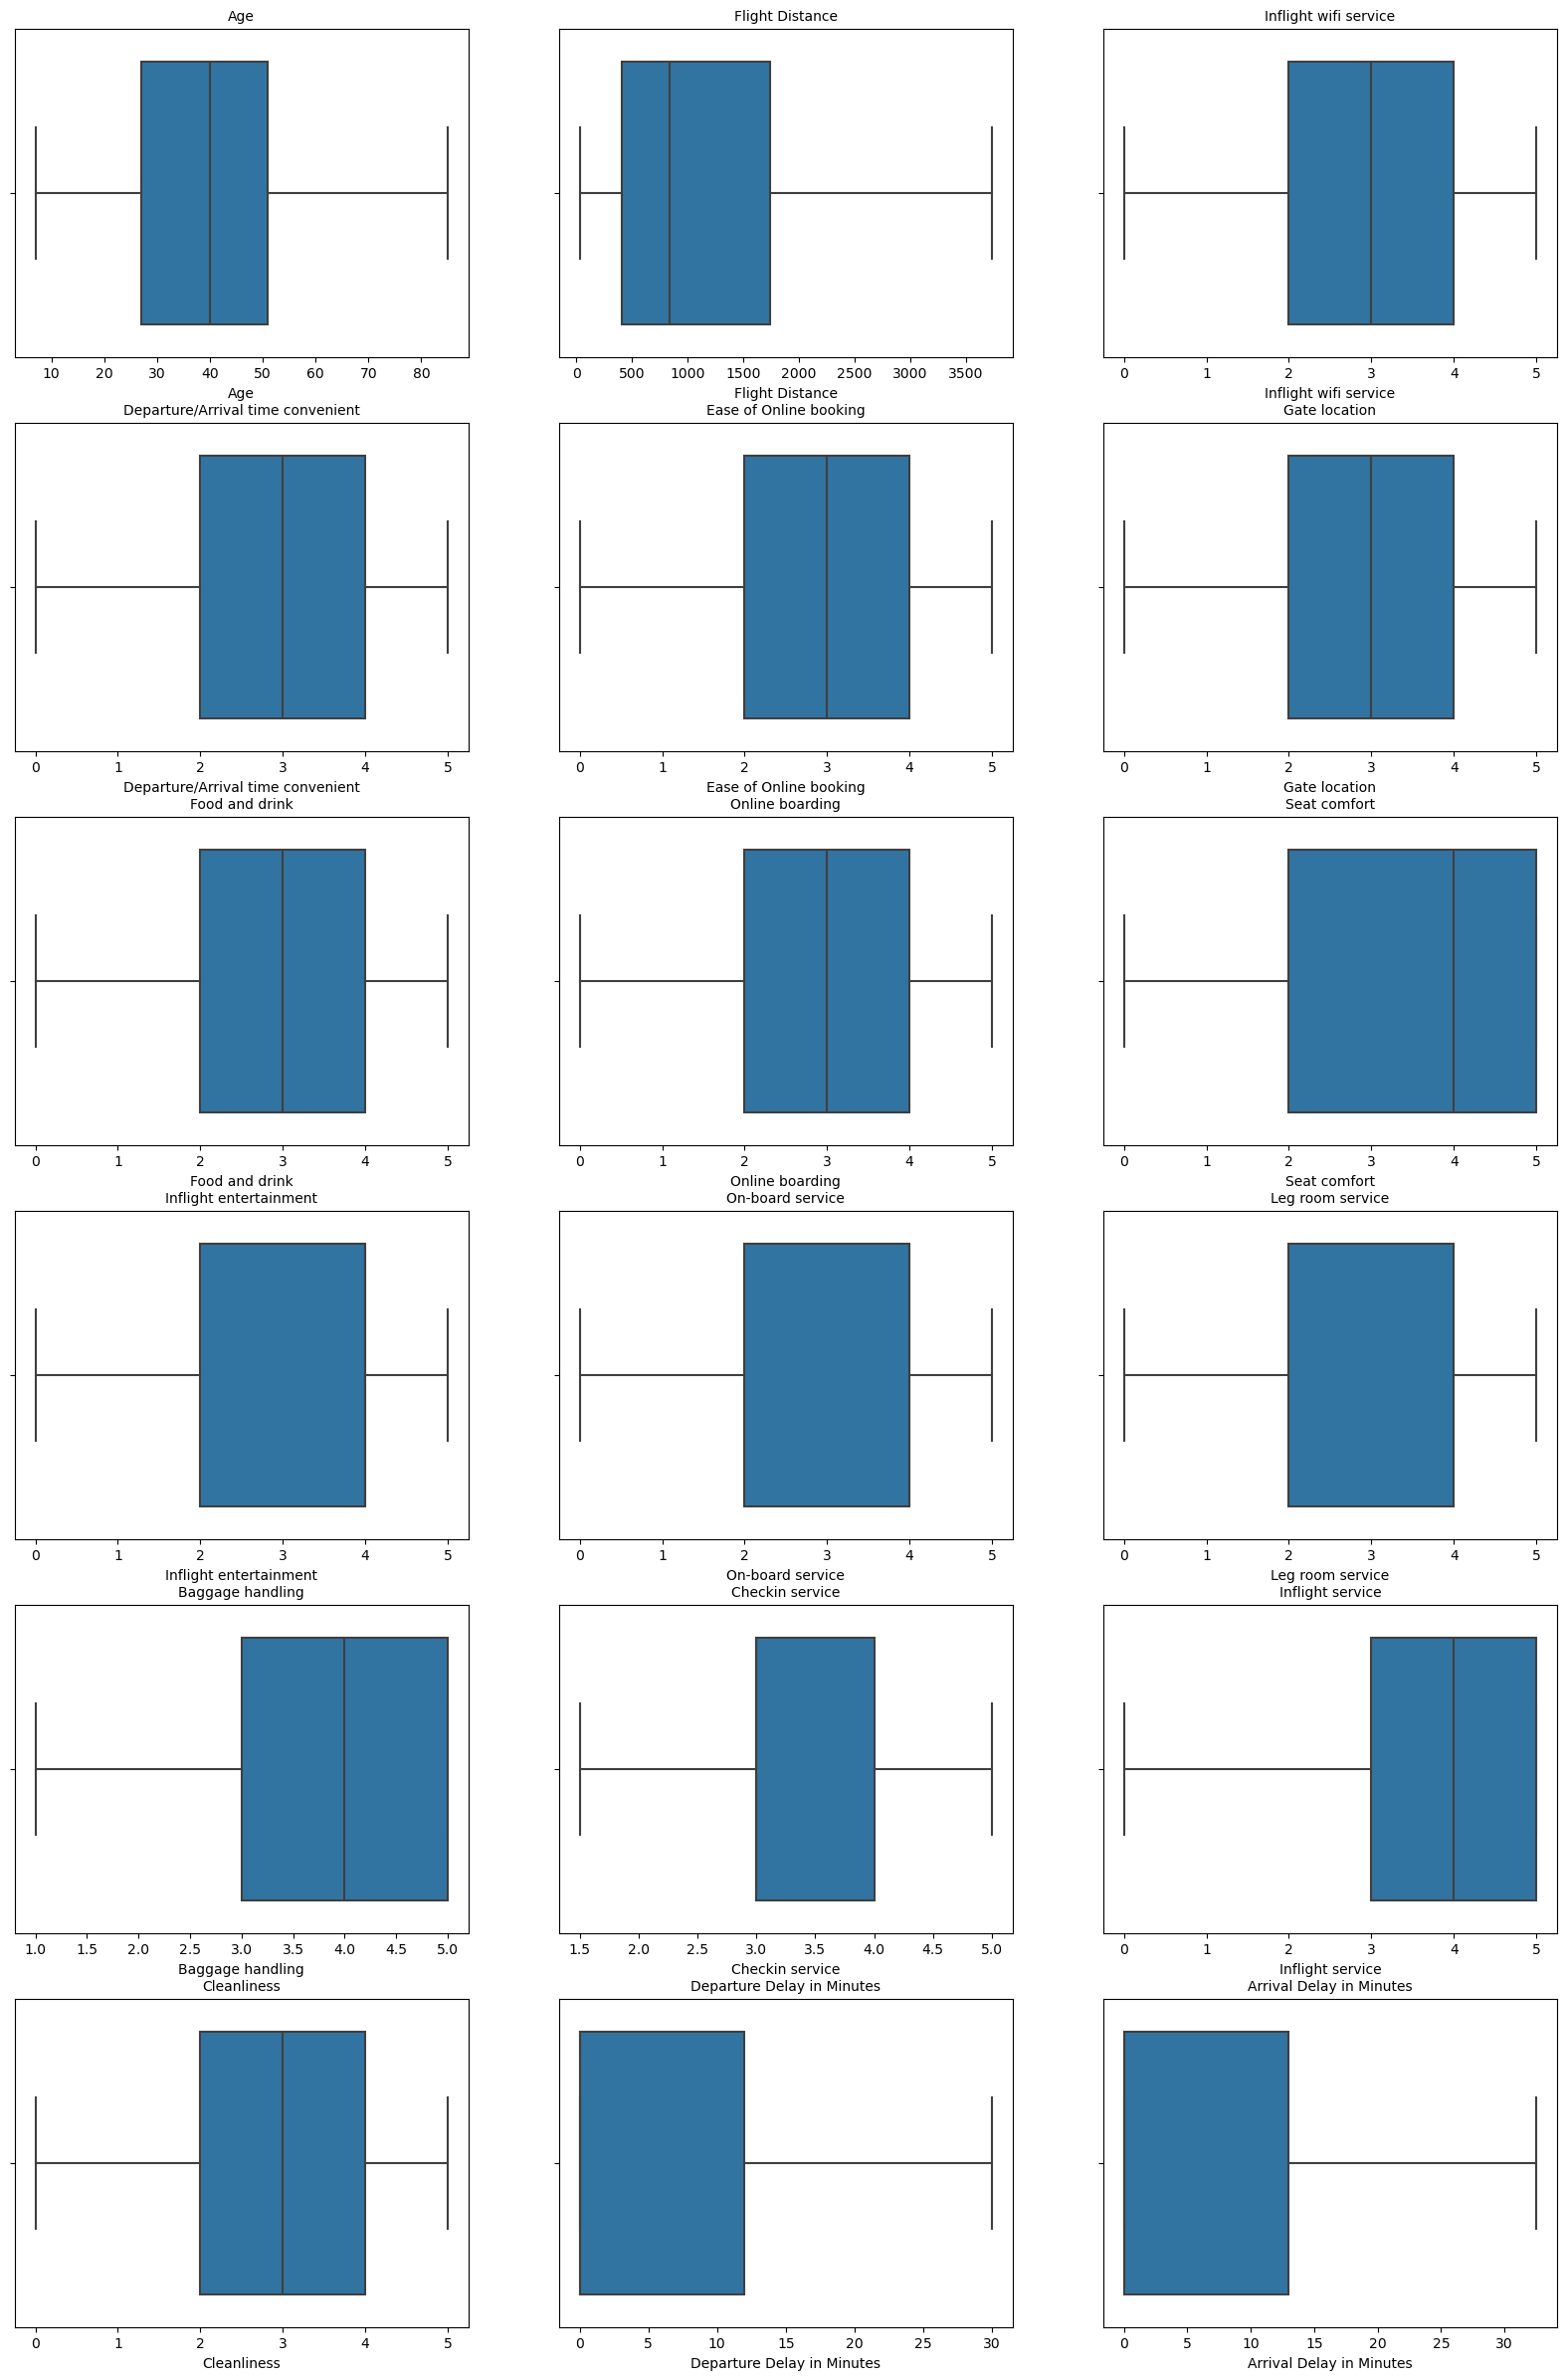

In [20]:
outlier_columns = ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in outlier_columns: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    lb = q1-1.5*iqr 
    ub = q3 + 1.5 * iqr 
    df[col] = df[col].clip(lower=lb, upper=ub)

numerical_columns = df.select_dtypes(include=['int','float'])
fig, axes = plt.subplots(6,3, figsize=(20,30))
axes = axes.flatten() 

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
plt.show()

### replacing the spaces with '_' :

In [22]:
df.columns = df.columns.str.replace(' ', '_')
df.head(3)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied


### Encoding : Gender, Customer_Type, Type_of_Travel 

In [24]:
df['Gender_Female'] = df['Gender'].replace({'Male':0, 'Female' : 1})
df['Customer_Type_loyal'] = df['Customer_Type'].replace({'Loyal Customer':1, 'disloyal Customer':0})
df['Type_of_Travel_Business'] = df['Type_of_Travel'].replace({'Business travel': 1, 'Personal Travel': 0})
df.head(3)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,0,1,0
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,0,0,1
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,1,1,1


In [25]:
new_df = df

In [26]:
df.drop(columns=['Gender', 'Customer_Type', 'Type_of_Travel'], axis=1, inplace=True)
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business
0,13,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,0,1,0
1,25,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,0,0,1
2,26,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,1,1,1


##### Oh, class and satisfaction is also there. 

In [28]:
df['Class'].replace({'Business':2, 'Eco':0, 'Eco Plus':1}, inplace=True)
df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace=True)
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business
0,13,1,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,0,1,0
1,25,2,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,0,0,1
2,26,2,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,1,1,1


### Univariate EDA 

In [30]:
# We know some of the features are on categoricalside even if there data type is Numerical. 
cat_columns = ['Gender_Female', 'Customer_Type_loyal', 'Type_of_Travel_Business', 'Class','Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',  'Cleanliness', 'satisfaction']
num_columns = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

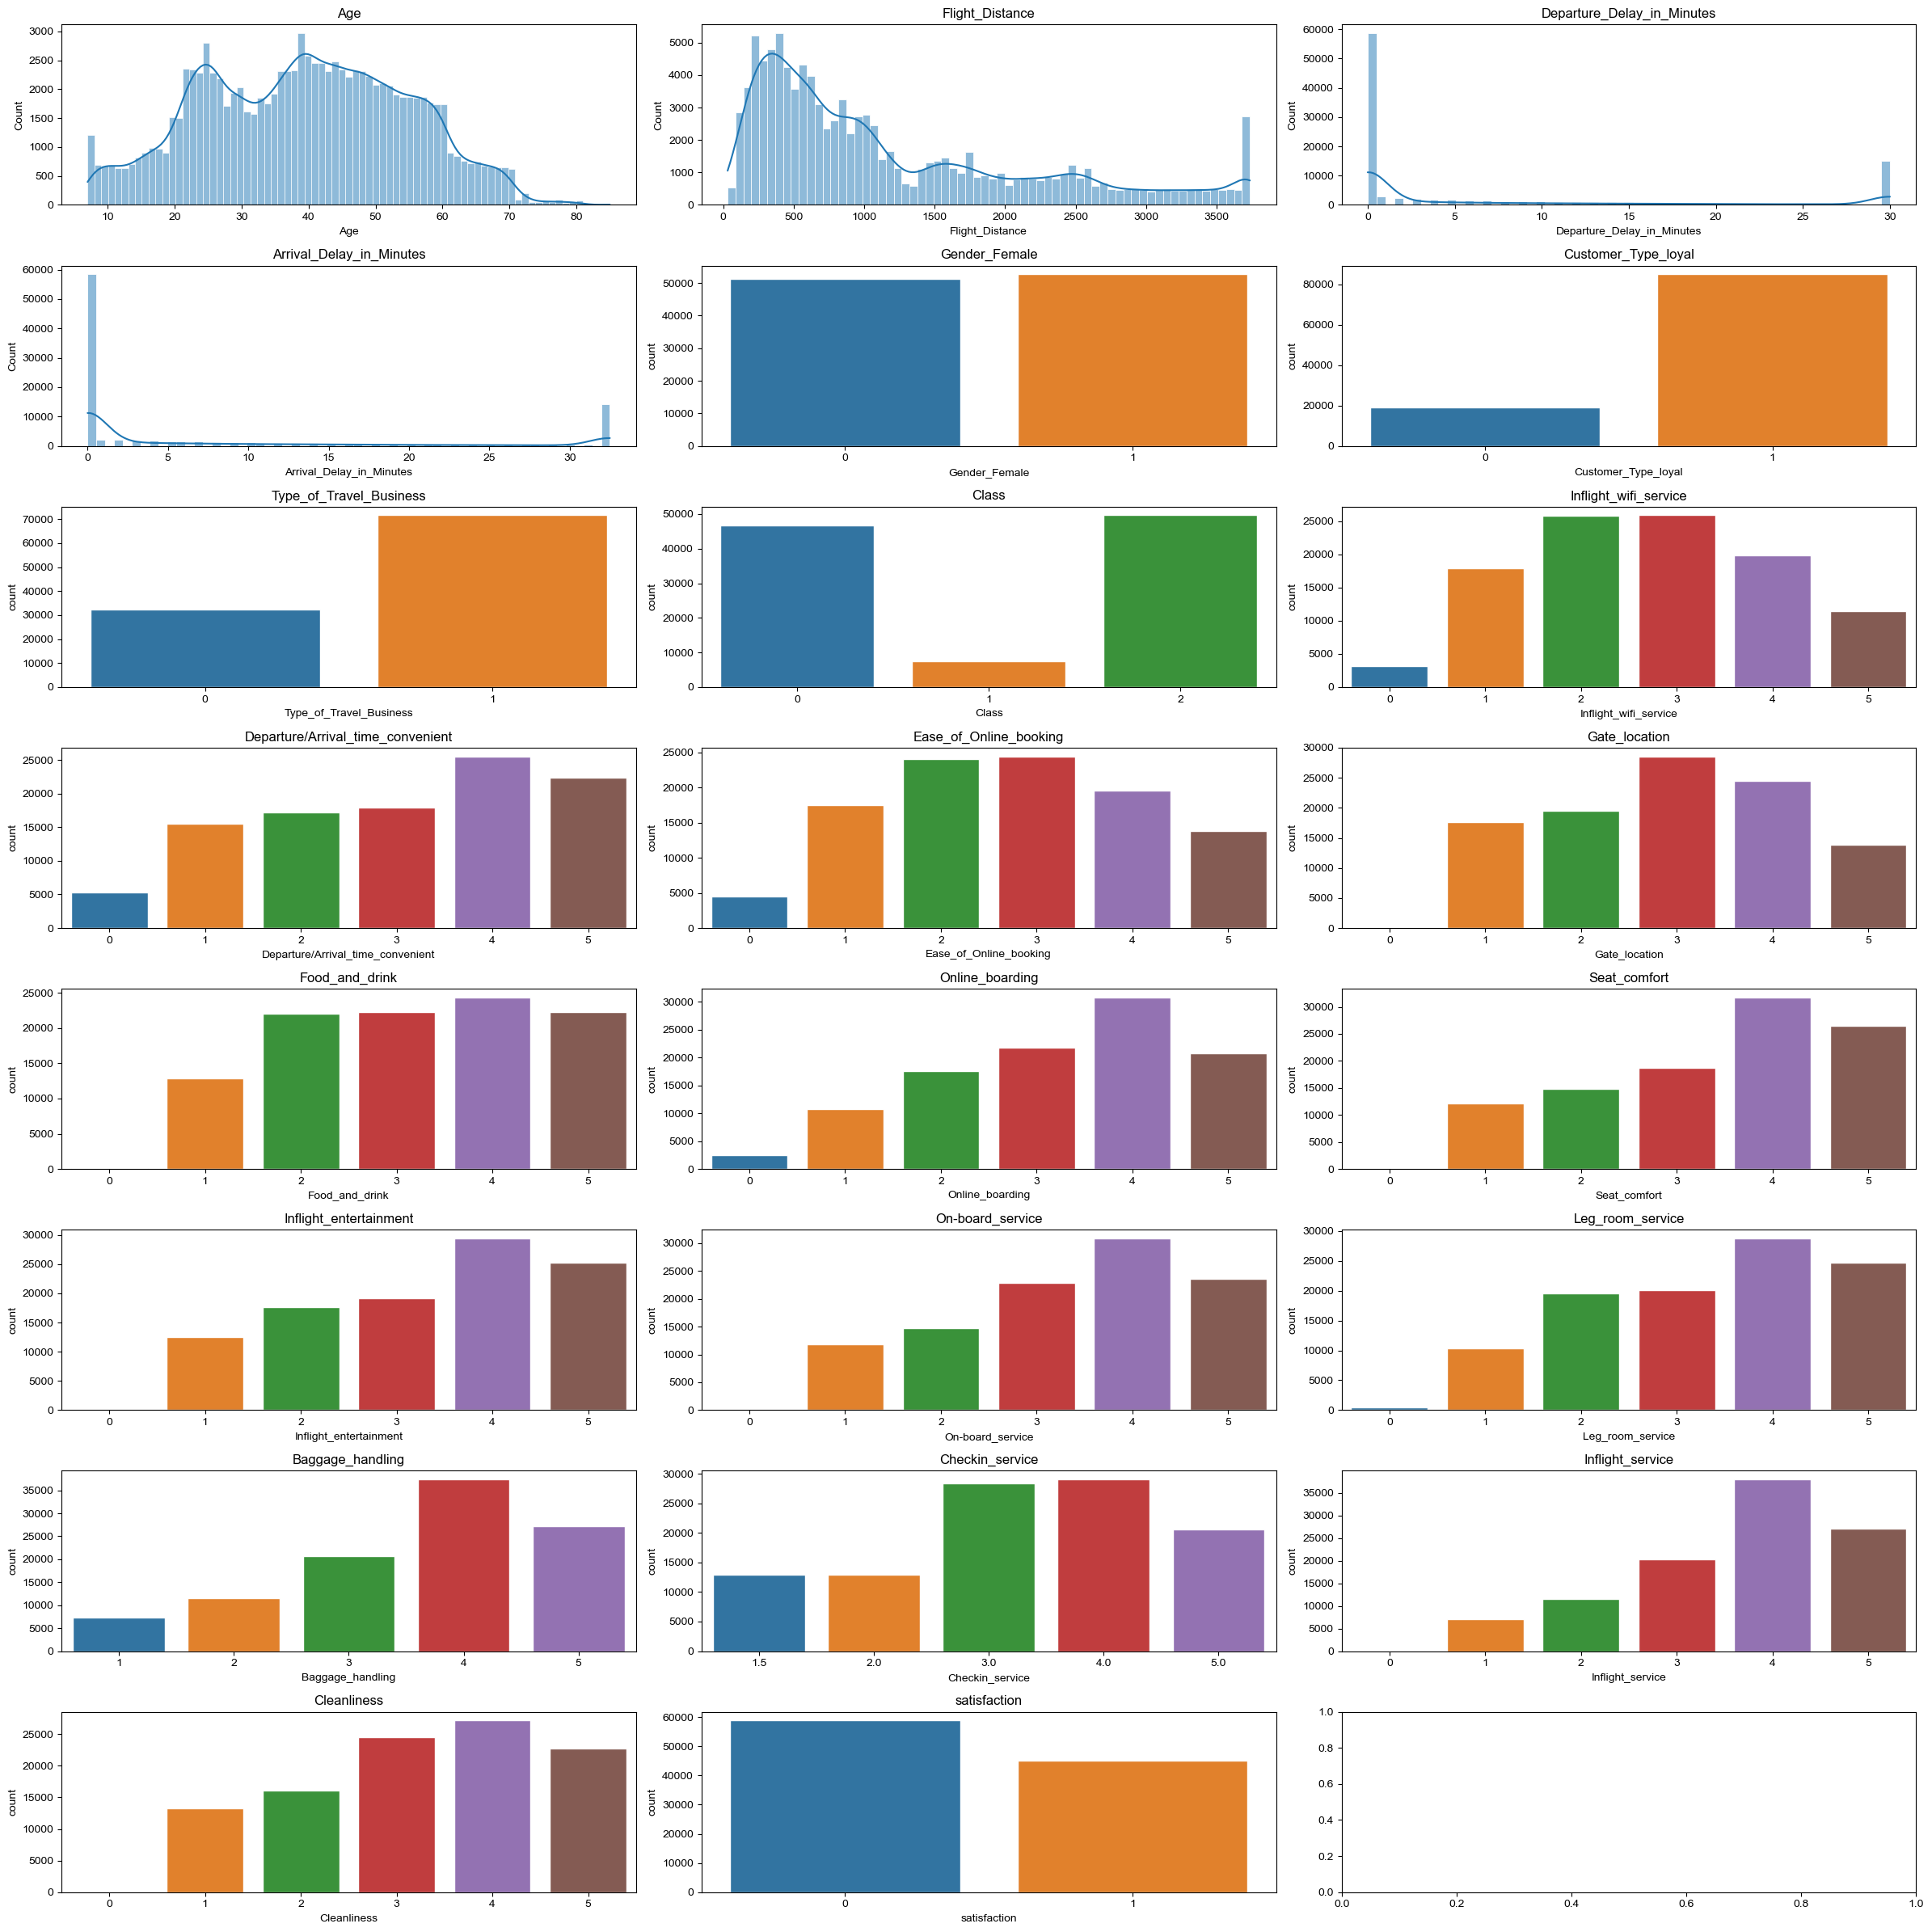

In [31]:
fig, axes = plt.subplots(8,3, figsize=(24,24))
axes = axes.flatten() 
sns.set_style("darkgrid")
for i, col in enumerate(num_columns): 
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j,col in enumerate(cat_columns): 
    if i + 1 + j < len(axes): 
        # counts =  df[col].value_counts()
        # axes[i+ 1 + j].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        sns.countplot(x=df[col], ax = axes[i+ 1 + j])
        axes[i+1+j].set_title(col)

plt.tight_layout()
plt.show()

### Multivariate Analysis :

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

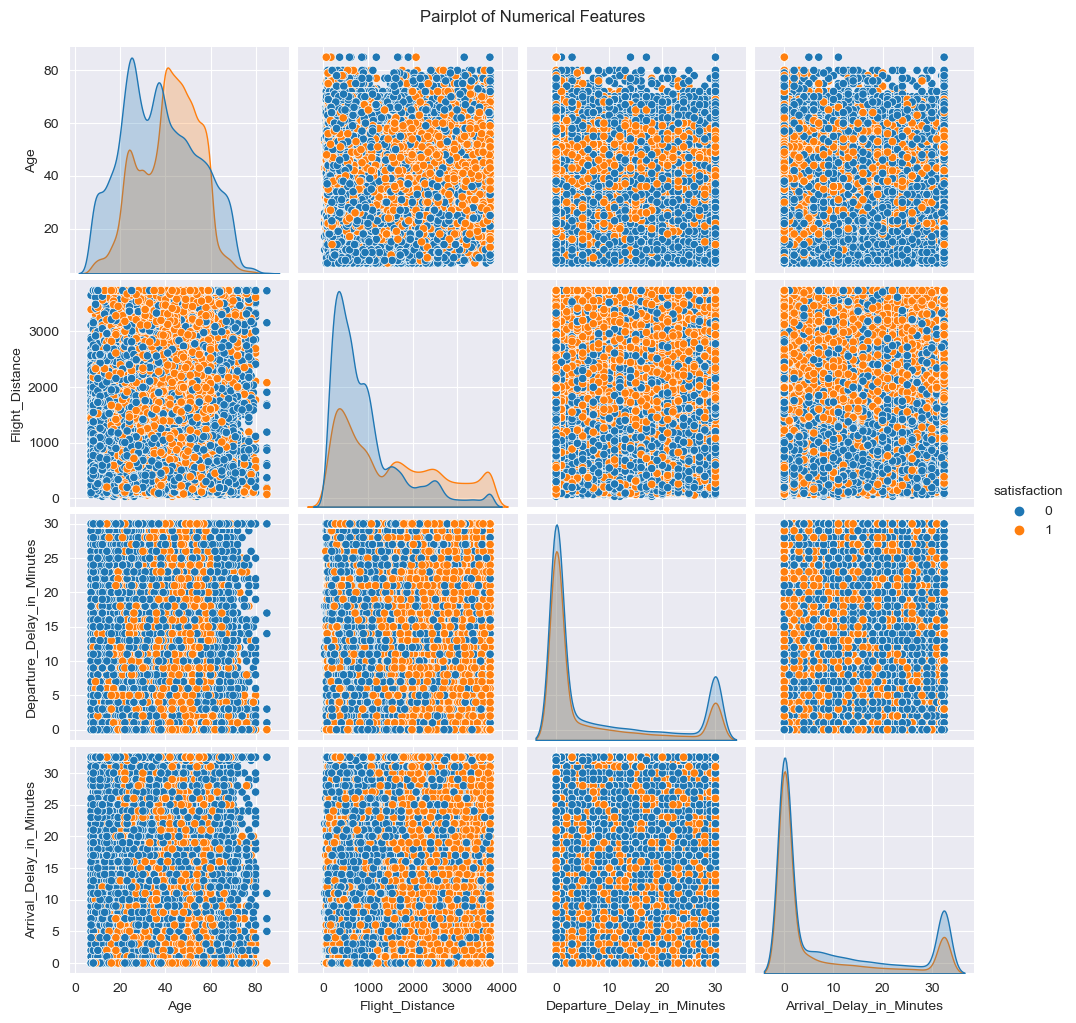

In [33]:
target = 'satisfaction'
sns.pairplot(df[num_columns + [target]], hue=target)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### Feature Engineering 

### 1. Feature Construction 

In [36]:
df['Total_Delay'] = df['Departure_Delay_in_Minutes'] + df['Arrival_Delay_in_Minutes']
df['Delay_Ratio'] = df['Total_Delay'] / (df['Flight_Distance'] + 1)
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business,Total_Delay,Delay_Ratio
0,13,1,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,0,1,0,43.0,0.093275
1,25,2,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,0,0,1,7.0,0.029661
2,26,2,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,1,1,1,0.0,0.000000


In [37]:
# Converting Age column using Binning Method. 
df['Age_group'] = pd.cut(df['Age'], bins=[0,18,30,50,100], labels=['Child', 'Youngster','Adult', 'Senior'])
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business,Total_Delay,Delay_Ratio,Age_group
0,13,1,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,0,1,0,43.0,0.093275,Child
1,25,2,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,0,0,1,7.0,0.029661,Youngster
2,26,2,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,1,1,1,0.0,0.000000,Youngster


In [38]:
# I should have labeled directly numbers instead of strings. 
df['Age_group'] = df['Age_group'].replace({'Adult':0, 'Child':1, 'Senior':2, 'Youngster':3})
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Customer_Type_loyal,Type_of_Travel_Business,Total_Delay,Delay_Ratio,Age_group
0,13,1,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,0,1,0,43.0,0.093275,1
1,25,2,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,0,0,1,7.0,0.029661,3
2,26,2,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,1,1,1,0.0,0.000000,3


### Now our data is all cleared. 

#### A very important step : Feature Selection 

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 1. Using Mutual information technique. 
from sklearn.feature_selection import mutual_info_classif 

mutual_info = mutual_info_classif(X_train, y_train, discrete_features=True)
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


                              Feature  Mutual Information
8                     Online_boarding            0.211611
23                        Delay_Ratio            0.190751
3               Inflight_wifi_service            0.161543
1                               Class            0.134969
21            Type_of_Travel_Business            0.113675
10             Inflight_entertainment            0.092882
2                     Flight_Distance            0.084806
9                        Seat_comfort            0.078537
12                   Leg_room_service            0.060404
11                   On-board_service            0.057027
5              Ease_of_Online_booking            0.051391
16                        Cleanliness            0.051153
0                                 Age            0.046413
13                   Baggage_handling            0.042488
15                   Inflight_service            0.040945
14                    Checkin_service            0.031965
7             

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [43]:
### Feature selection : 
top_features = mutual_info_df.head(12)['Feature'].tolist() 

In [44]:
final_df = df[top_features + ['satisfaction']]
final_df.head(3)

,Online_boarding,Delay_Ratio,Inflight_wifi_service,Class,Type_of_Travel_Business,Inflight_entertainment,Flight_Distance,Seat_comfort,Leg_room_service,On-board_service,Ease_of_Online_booking,Cleanliness,satisfaction
0,3,0.093275,3,1,0,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,2,1,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,2,1,5,1142.0,5,3,4,2,5,1


### Checking for imbalanced data 

In [46]:
final_df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

### Model Training 

In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import lightgbm as lgb 

X = final_df.drop('satisfaction', axis=1)
y = final_df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

lgbm_model = lgb.LGBMClassifier() 
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test) 

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Accuracy : 0.9436


### Model pickling 

In [50]:
import pickle 
with open('lgbm_model.pkl', 'wb') as file: 
    pickle.dump(lgbm_model, file) 

### Model loading and testing : 

In [52]:
with open('lgbm_model.pkl', 'rb') as file: 
    loaded_model = pickle.load(file) 

In [53]:
### New data Predictions 

In [54]:
X_new = np.array([
    [5 , 0.000000 ,4 ,0, 0,	2 ,3736.5, 5, 2, 2,	4,	3],
    [2	, 0.000000 , 	2 , 1	, 1 ,3	,986.0 ,	3 ,	4 ,	4	, 2	, 3]
])
y_pred_new = loaded_model.predict(X_new)
print('Predictions', y_pred_new)

Predictions [1 0]
